---
title: "Kernel Density Estimation"
description: KAIST Data Science Programming 1 - 4-5-1. Kernel Density Estimation에 대한 내용입니다.
date: 2023-11-07
author: "Chanseok Kang"
toc: true 
categories: [Python, KAIST, Statistics]
title-block-banner: true
---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

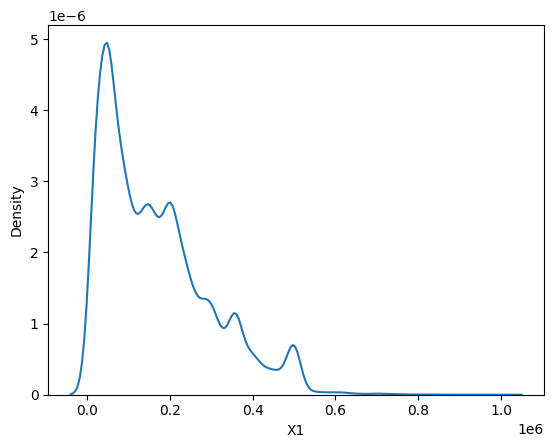

In [8]:
objData = pd.read_excel('../../data/default of credit card clients.xls', skiprows=[1, 2])
objFigure = sns.kdeplot(data=objData['X1'])
plt.show()

**Kernel Density Estimation**이라는 것은 분포의 밀집한 정도, 즉 Density를 kernel을 사용해서 추정하는 방법이다. 위의 그림은 `seaborn` 패키지를 사용해서 KDE Plot을 그린 것이고, 이 그래프를 그린 함수를 $\hat{f}_h(x)$ 라고 하면 아래와 같이 정의할 수 있다.

$$ 
\hat{f}_h(x) = \frac{1}{n} \sum_{i=1}^n K_h(x - x_i) = \frac{1}{nh}\sum_{i=1}^n K(\frac{x - x_i}{h})
$$

여기에서 $K$를 kernel function이라고 표현한다. 사실 Density Estimation을 하는 것이 무슨 의미인지 궁금해할 수 있지만, 실제 값과 추정한 값 간의 차이 ($x - x_i$) 를 어떤 Kernel function을 적용해서 표현하겠다는 것을 의미하는 것이다. 이 차이를 $Z$라고 표현하면 Kernel function이 적용된 term은 다음과 같이 적용할 수 있다.

$$ 
K_h(x - x_i) = \frac{1}{h} K(\frac{Z}{h})
$$

이 때, Kernel은 다양한 kernel을 시도해볼 수 있다. 만약 Kernel을 uniform kernel을 써보겠다 하면, 이 말은 실제값과 추정치간의 차이가 -1과 1 사이의 값은 하나로 구분하겠다는 것을 의미하고 결국 다음과 같이 어떤 비례의 형태로 표현할 수 있다. 참고로 $\mathcal{1}$ 함수는 -1과 1 사이에서만 counting 하는 indicator function이다.

$$
K(\frac{Z}{h}) \propto \frac{1}{2} \mathcal{1}_{-1 < \frac{Z}{h} < 1}
$$

반면 gaussian kernel을 사용하면 우리가 일반적으로 표현하는 gaussian distribution의 형태로 정의할 수 있다.

$$
K(\frac{Z}{h}) \propto \exp(-\frac{1}{2} (\frac{Z}{h})^2)
$$

사실 어떤 분포를 정확히 추정하는 것은 거의 어렵다. 그렇기 때문에 위와 같이 실제값과 추정치간의 차이값으로 분포를 추정하는 방식이 쓰이는 것이고, 어떤 Kernel을 사용했느냐에 따라서 기존의 분포를 정확히 추정할 수 있고, 혹은 조금 smoothing된 형태로 추정할 수도 있는 것이다. [여기](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation)에 소개되어 있는 내용이지만, seaborn에서는 기본적으로 Gaussian Kernel을 사용하여 observation에 대한 결과를 smoothing해준다고 되어 있다.

일단 kernel density estimation은 kernel을 어떤 것을 선택하냐만 다른 것이지 기존의 분포를 추정한다는 결과는 변함이 없기 때문에 일종의 non-parametric density estimation이라고 할 수 있다. 다만 output의 형태는 앞에서 소개한 것처럼 $h$ 에 의해서 scale이 조절이 되기 때문에 다른 한편으로는 parameter가 존재한다고 할 수 있다. 참고로 kdeplot의 argument에는 *bw* (bin width) 값이 있는데, 이 bin width에 따라서 분포의 형태가 조금 다르게 표현되기도 한다. 아래의 그림은 그에 대한 결과이다.

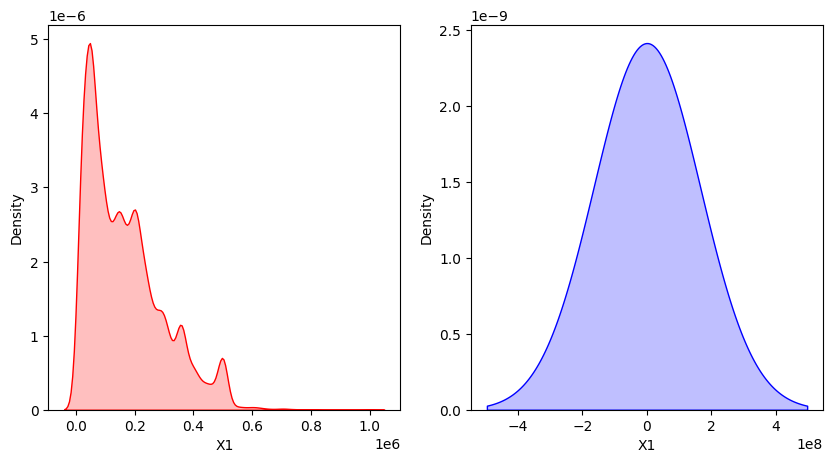

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
objFigure = sns.kdeplot(data=objData['X1'], fill=True, color='r', bw_adjust=1)
plt.subplot(122)
objFigure = sns.kdeplot(data=objData['X1'], fill=True, color='b', bw_adjust=10000)
plt.show()